In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image 

model = tf.keras.models.load_model("age_sex_detection_rmsprop.keras") ### model from google drive

In [ ]:
import cv2
path = r"image"                     ### image path   
img  = cv2.imread(path)

Text(0.5, 1.0, 'original image')

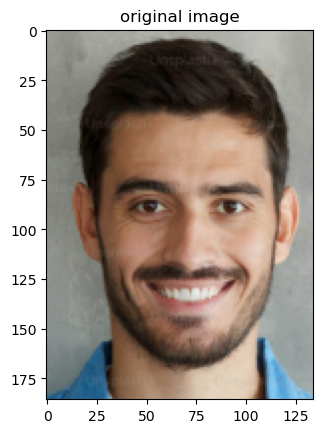

In [45]:
img_colour = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_colour)
plt.title("original image")

In [46]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (70,70))
img = img/255.0

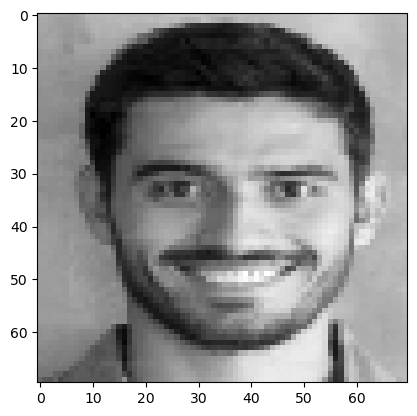

In [47]:
plt.imshow(img,cmap='gray')

In [49]:
img = np.expand_dims(img, axis=[0, -1])

In [50]:
print(model.predict(img))                       ### predicted gender is male and predicted age is 29

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
[array([[0.83575886]], dtype=float32), array([[29.231312]], dtype=float32)]


# Visualize activation maps

##### layer = ['input_layer_1', 'conv2d_6', 'dropout_8', 'activation_6', 'max_pooling2d_6', 'conv2d_7', 'dropout_9', 'activation_7', 'max_pooling2d_7', 'conv2d_8', 'dropout_10', 'activation_8', 'max_pooling2d_8', 'conv2d_9', 'dropout_11', 'activation_9', 'max_pooling2d_9', 'conv2d_10', 'dropout_12', 'activation_10', 'max_pooling2d_10', 'conv2d_11', 'dropout_13', 'activation_11', 'max_pooling2d_11', 'flatten_1', 'dense_2', 'dense_3', 'dropout_14', 'dropout_15', 'sex_out', 'age_out']

In [53]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 70, 70, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 70, 70,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 70, 70,    │          0 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 70, 70,    │          0 │ dropout_8[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 35, 35,    │          0 │ activation_6[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 35, 35,    │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 35, 35,    │          0 │ conv2d_7[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 35, 35,    │          0 │ dropout_9[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 17, 17,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 17, 17,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 17, 17,    │          0 │ conv2d_8[0][0]    │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 17, 17,    │          0 │ dropout_10[0][0]  │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 8, 8, 128) │          0 │ activation_8[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 8, 8, 256) │          0 │ conv2d_9[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 8, 8, 256) │          0 │ dropout_11[0][0]  │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 4, 4, 256) │          0 │ activation_9[0][… │
│ (MaxPooling2D)      │                   │            │                 

 Total params: 7,987,206 (30.47 MB)

 Trainable params: 3,993,602 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,993,604 (15.23 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


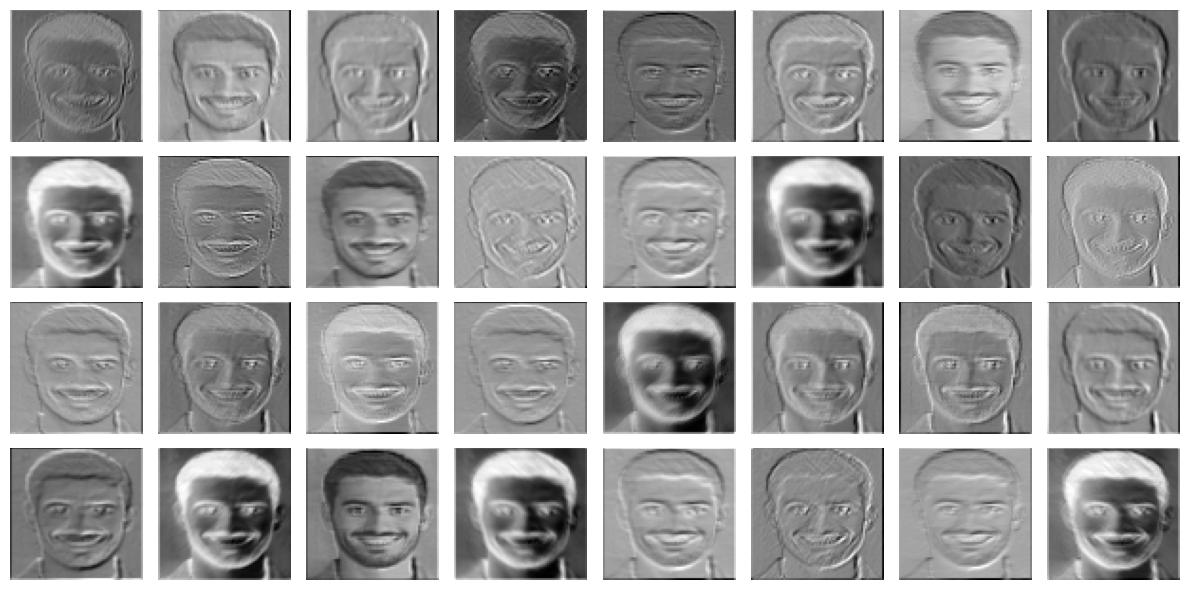

In [56]:
layer_name = "conv2d_6"
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


activations = activation_model.predict(img)


num_filters = activations.shape[-1]  
fig, axes = plt.subplots(4, 8, figsize=(12, 6))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  # Show activation map
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


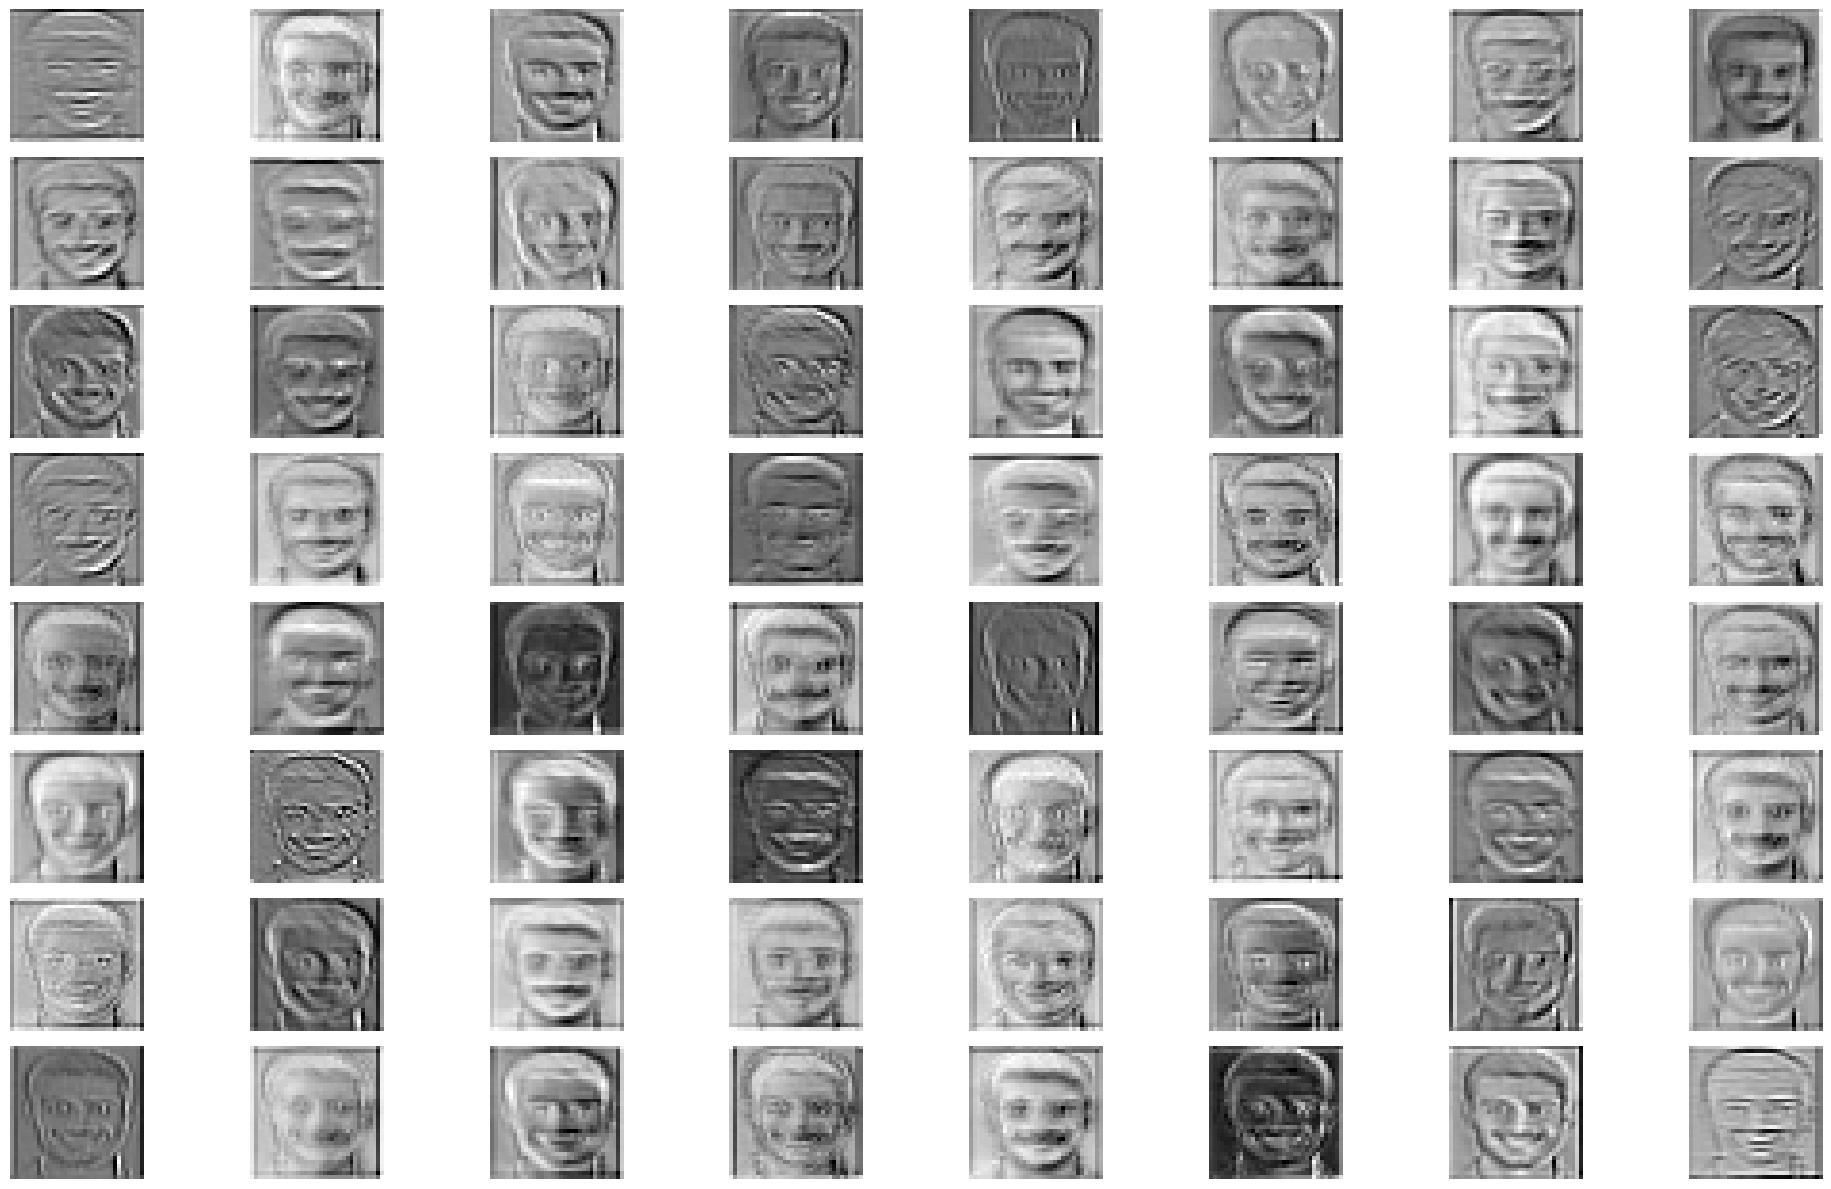

In [59]:
layer_name = "conv2d_7"
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


activations = activation_model.predict(img)


num_filters = activations.shape[-1]  
fig, axes = plt.subplots(8,8 , figsize=(20, 12))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  # Show activation map
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


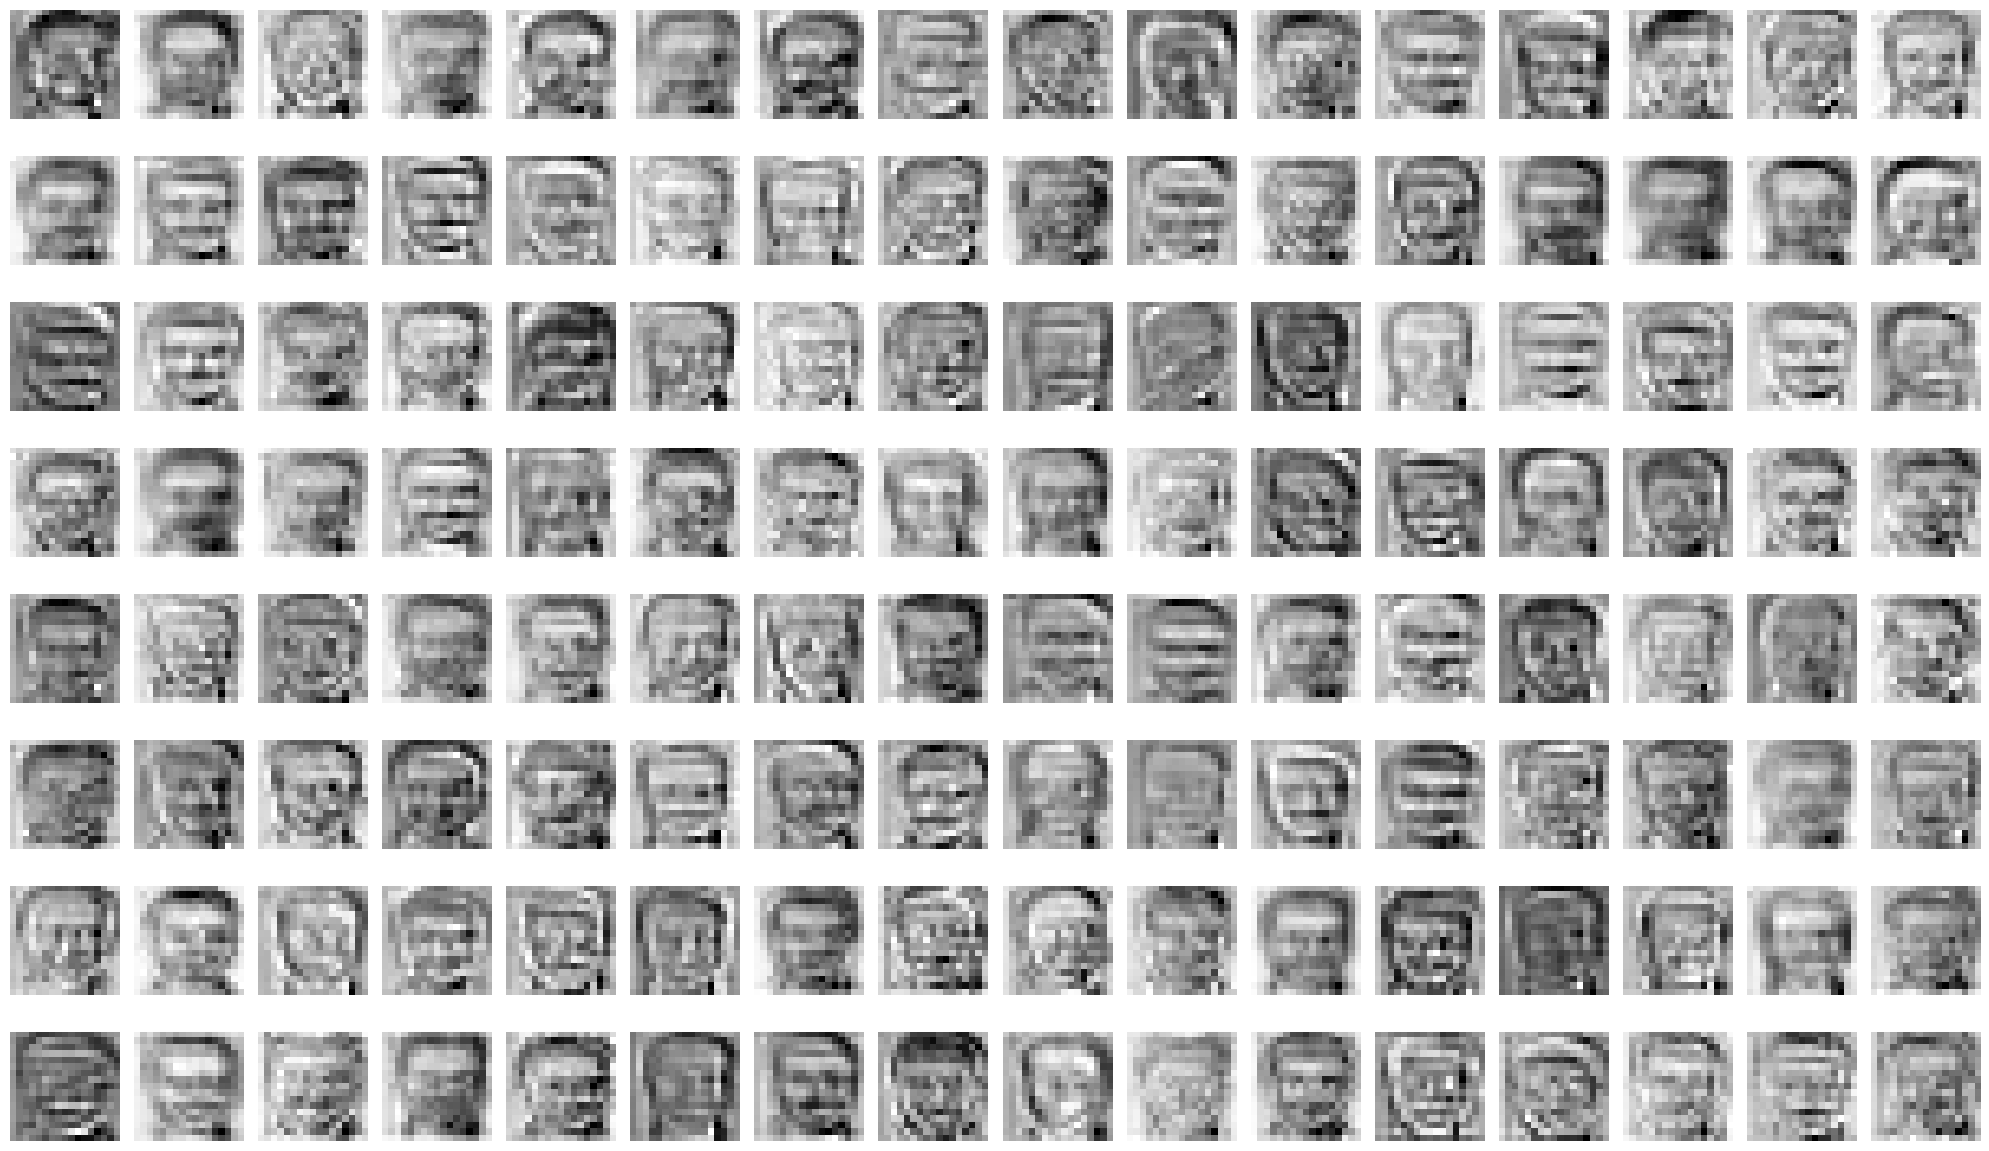

In [62]:
layer_name = "conv2d_8"  
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)

activations = activation_model.predict(img)

num_filters = activations.shape[-1] 
fig, axes = plt.subplots(8,16 , figsize=(20, 12))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


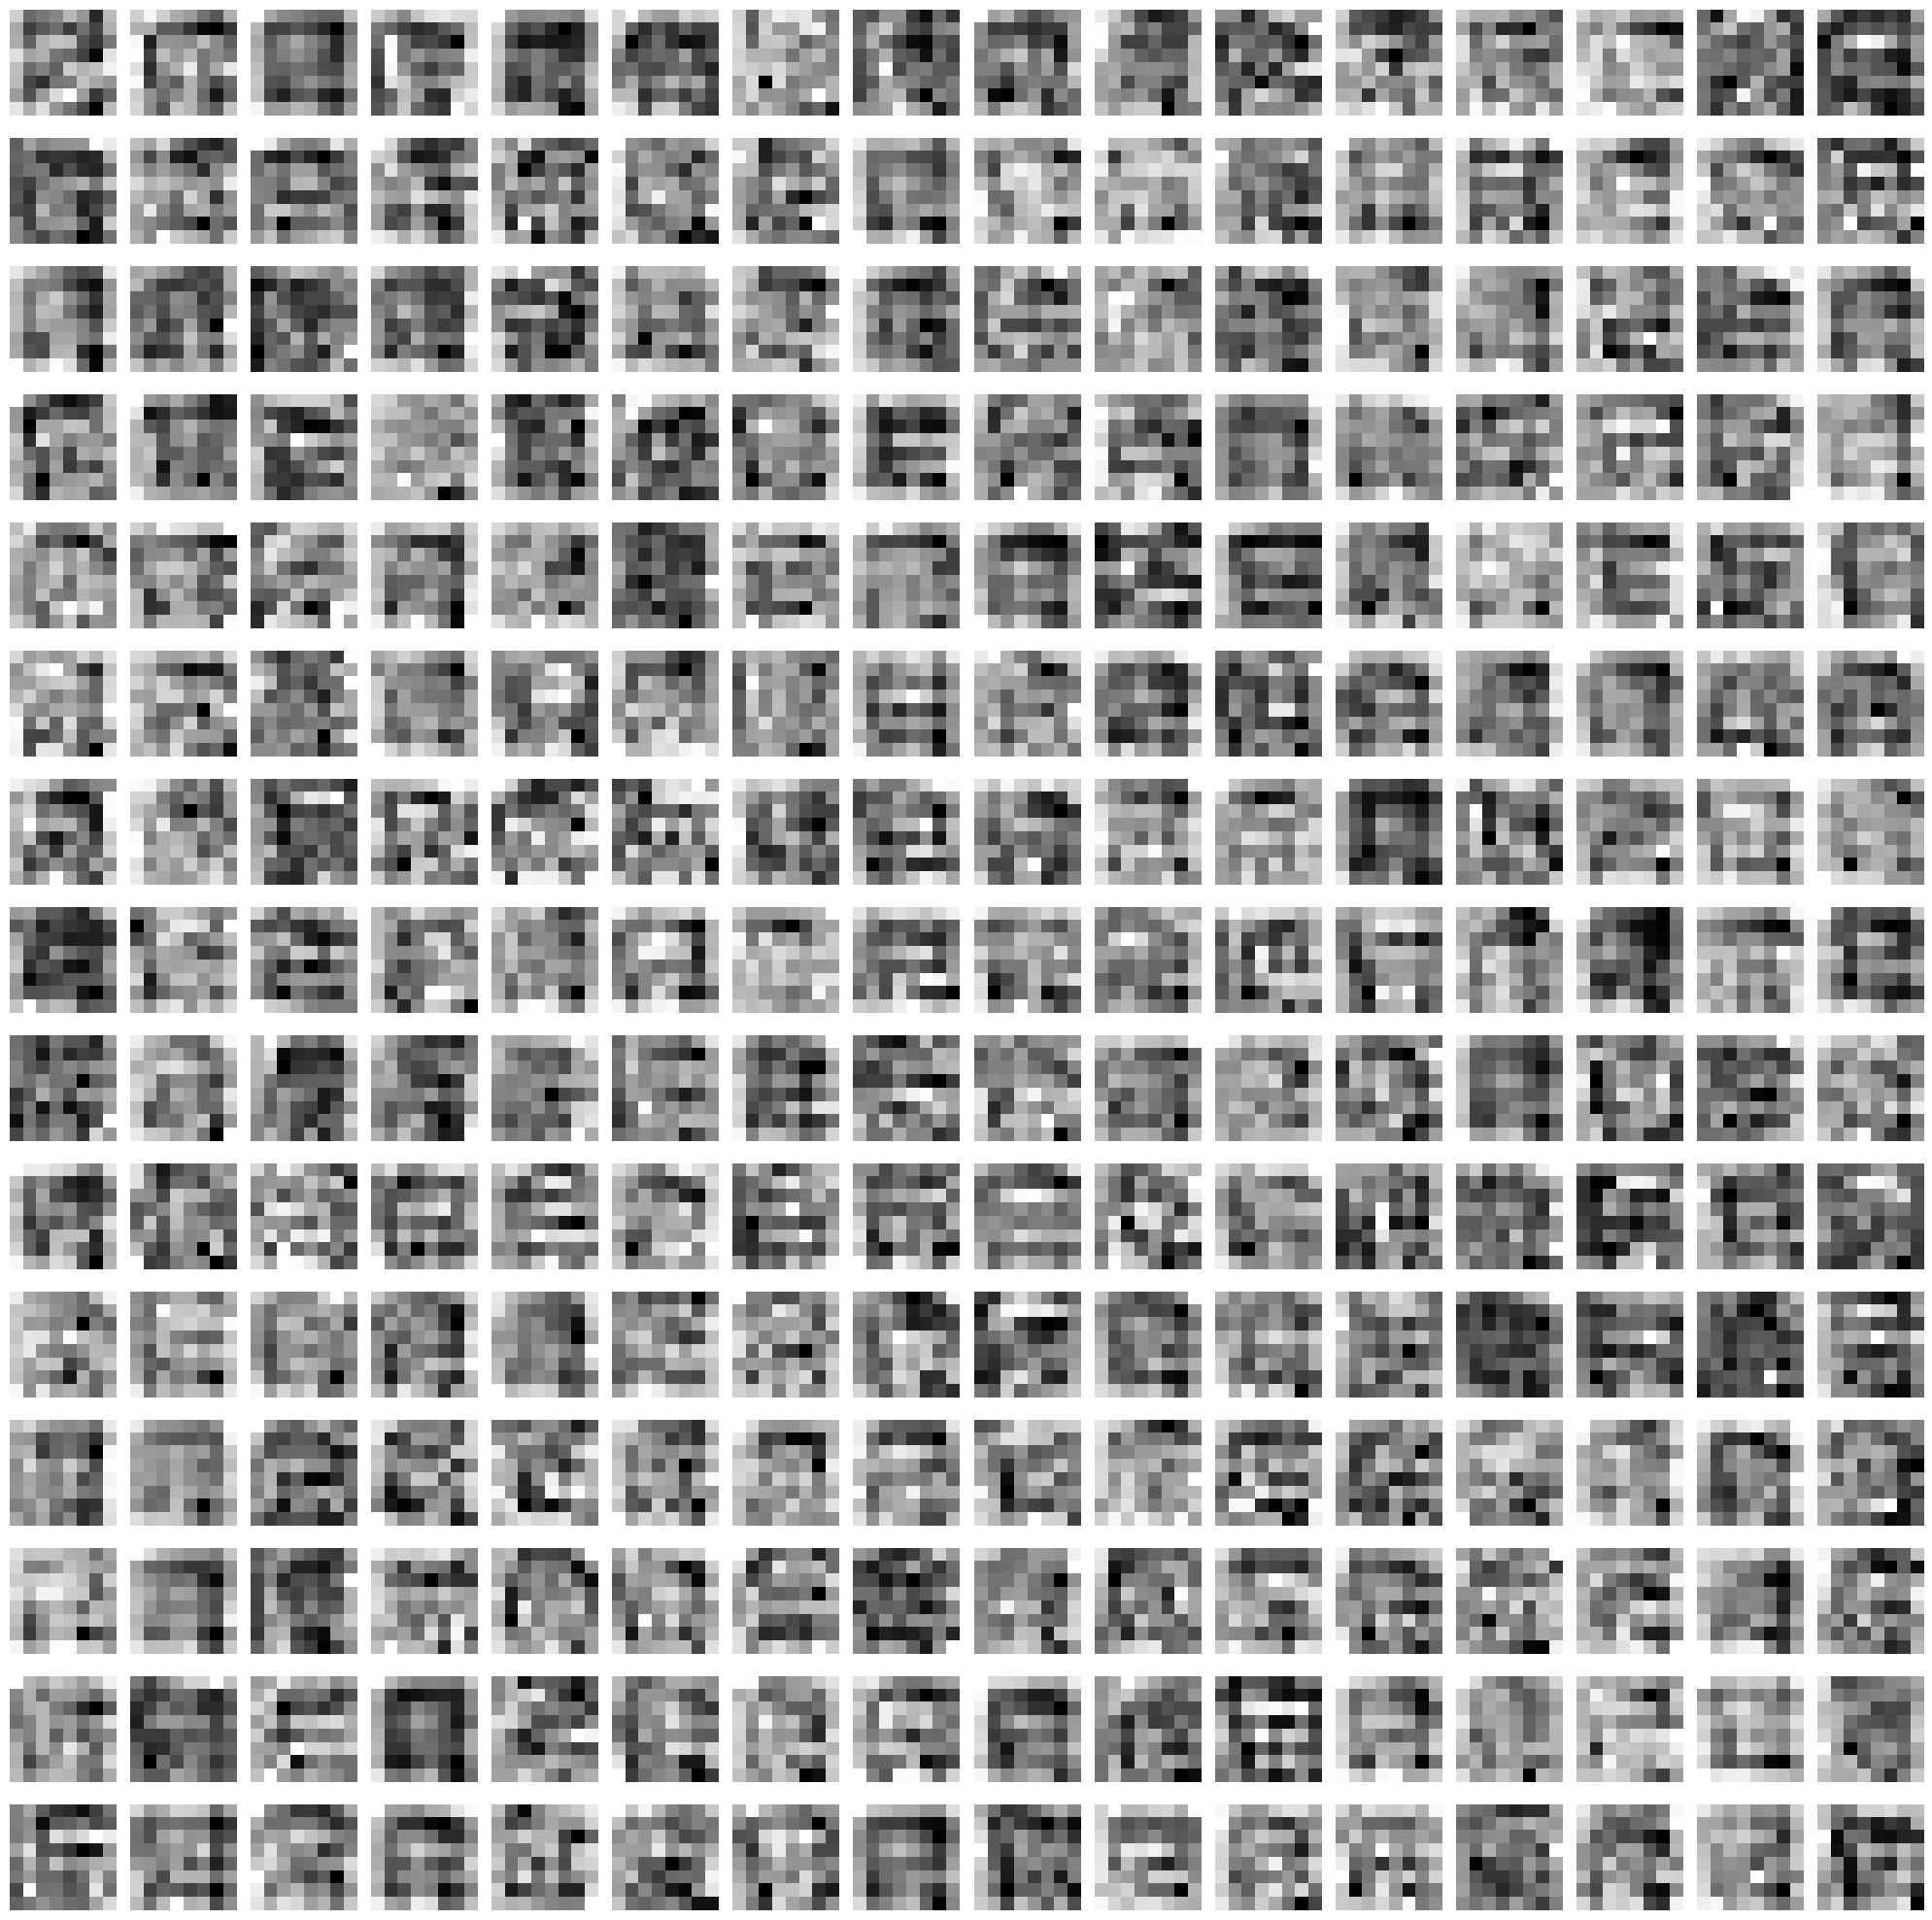

In [65]:
layer_name = "conv2d_9"
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


activations = activation_model.predict(img)


num_filters = activations.shape[-1]  
fig, axes = plt.subplots(15, 16, figsize=(20, 20))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  # Show activation map
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


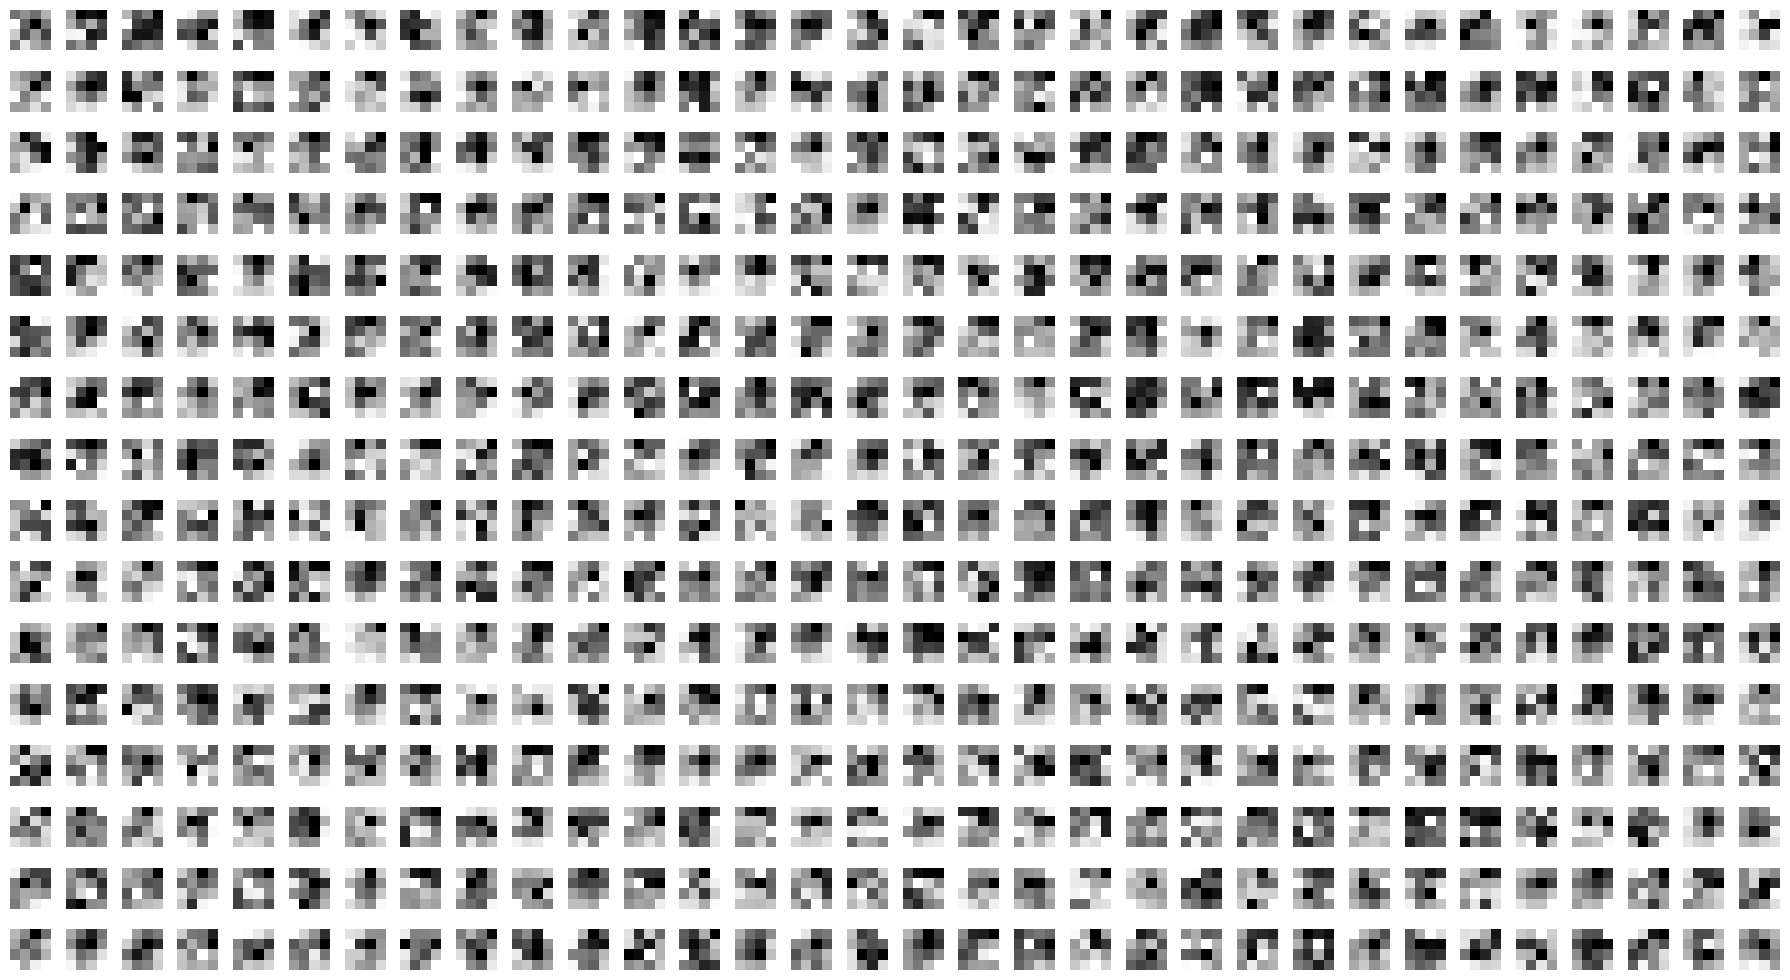

In [67]:
layer_name = "conv2d_10"
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


activations = activation_model.predict(img)


num_filters = activations.shape[-1]  
fig, axes = plt.subplots(16, 32, figsize=(18, 10))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  # Show activation map
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


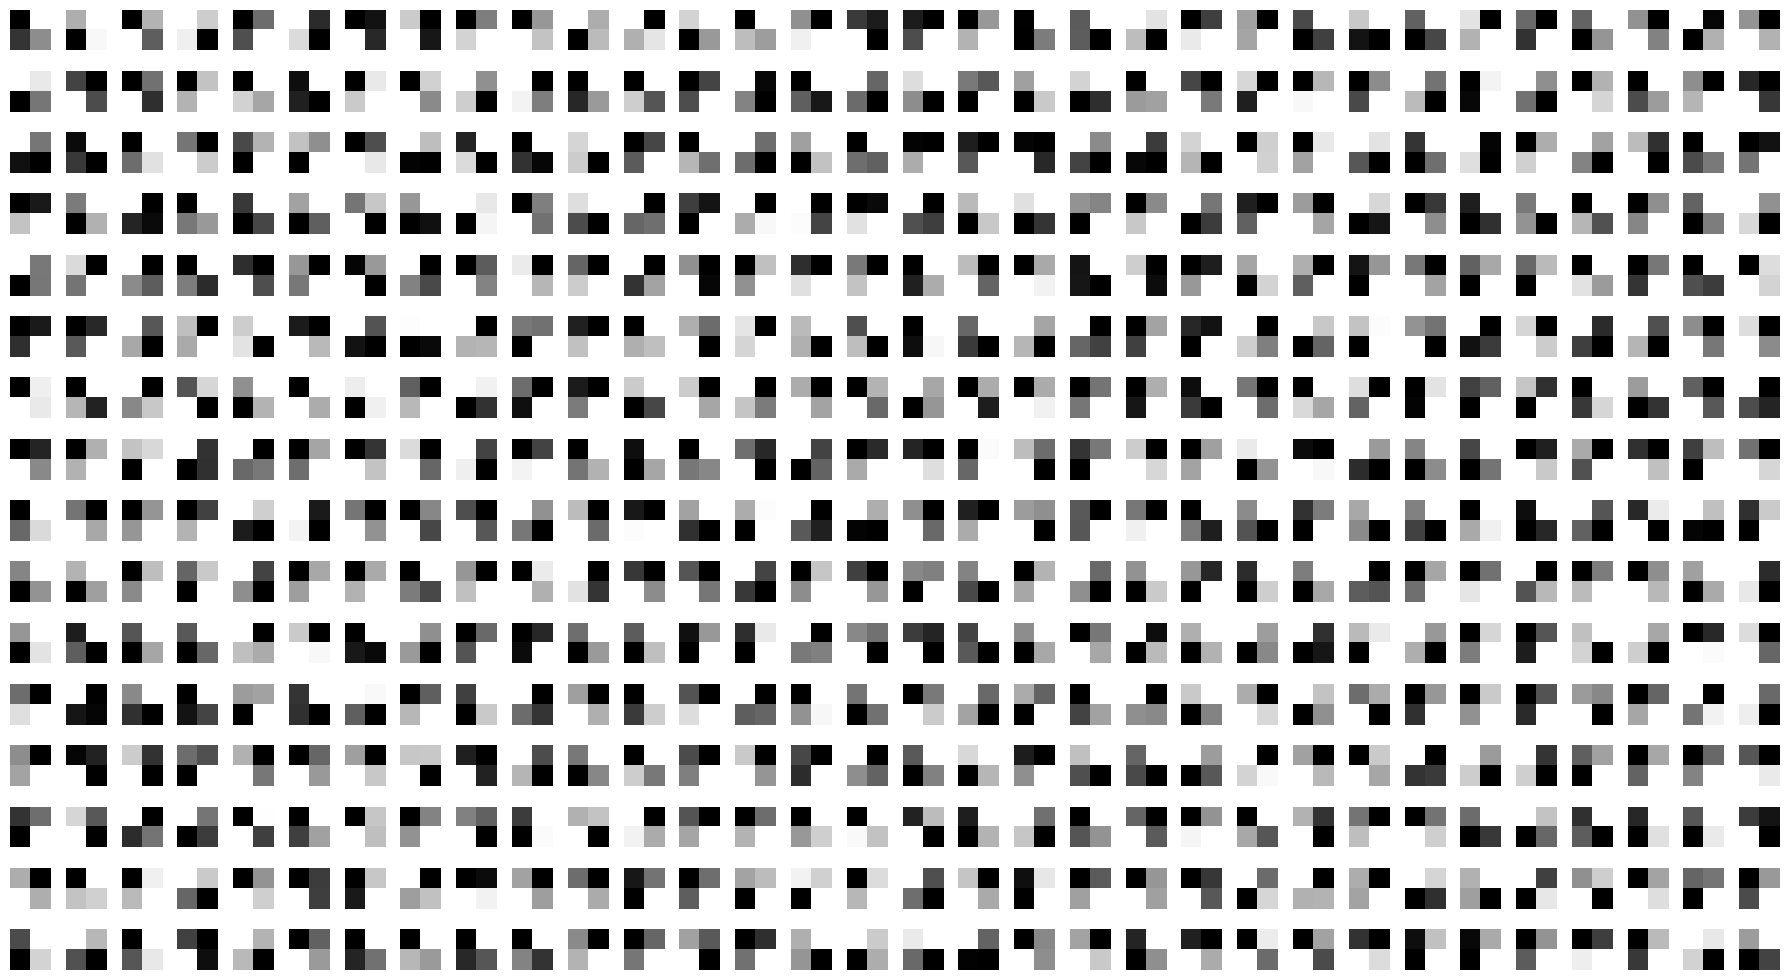

In [68]:
layer_name = "conv2d_11"
layer_output = model.get_layer(layer_name).output

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)


activations = activation_model.predict(img)


num_filters = activations.shape[-1]  
fig, axes = plt.subplots(16, 32, figsize=(18, 10))  

for i, ax in enumerate(axes.flat):
    if i < num_filters:
        ax.imshow(activations[0, :, :, i], cmap="gray")  # Show activation map
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


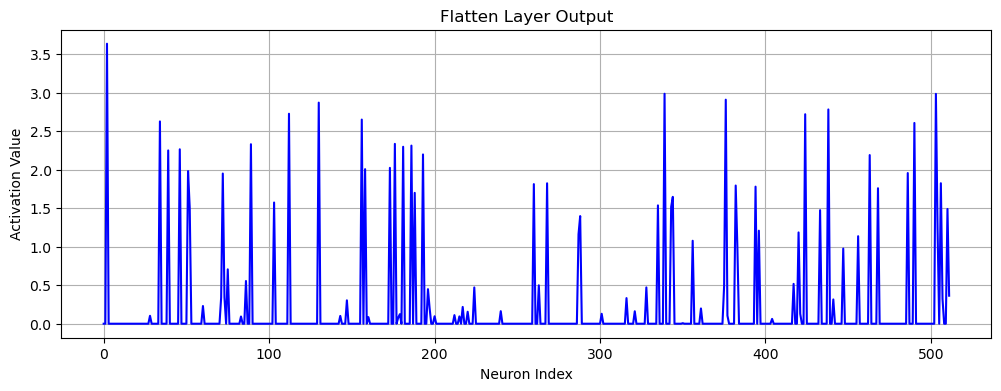

In [70]:
layer_name = "flatten_1"  
layer_output = model.get_layer(layer_name).output


activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)

activations = activation_model.predict(img)

flatten_output = activations[0] 

plt.figure(figsize=(12, 4))
plt.plot(flatten_output, color="blue")
plt.title("Flatten Layer Output")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Value")
plt.grid()
plt.show()